In [ ]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\mahes\anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.1.0               |   py39haa95532_0         946 KB
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ruamel.yaml-0.17.21        |   py39h2bbff1b_0         174 KB
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0 None
  ruamel.yaml        pkgs/main/win-64::ruamel.yaml-0.17.21-py39h2bbff1b_0 None
  ruamel.yaml.clib   pkgs/main/win-64::ruamel.yaml.clib-0.2.6-py39h2bbff1b_1 None



In [ ]:
#Import Section
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Import matplotlib & seaborn for visualisation
import json
from pandas.io.json import json_normalize
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import numpy as np
init_notebook_mode(connected=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import missingno as msno

In [ ]:
df_train = pd.read_csv("train.csv",sep=',')

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\4227475142.py:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df_test = pd.read_csv("test.csv",sep=',')

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\1308695706.py:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df_train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [ ]:
df_test.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6167871330617112363,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024
1,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0643697640977915618,"{""continent"": ""Europe"", ""subContinent"": ""South...",0643697640977915618_1508175522,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508175522,1,1508175522
2,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6059383810968229466,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",6059383810968229466_1508143220,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508143220,1,1508143220
3,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2376720078563423631,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2376720078563423631_1508193530,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""8"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508193530,1,1508193530
4,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2314544520795440038,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2314544520795440038_1508217442,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""9"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508217442,1,1508217442


In [ ]:
json_columns = ['device', 'geoNetwork','totals', 'trafficSource']
def load_dataframe(filename):
    #path = "../input/" + filename
    df = pd.read_csv(filename, converters={column: json.loads for column in json_columns},
                     dtype={'fullVisitorId': 'str'})

    for column in json_columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df

In [ ]:
train = load_dataframe("train.csv")
train.head()

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\3844167124.py:8: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\3844167124.py:8: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\3844167124.py:8: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\3844167124.py:8: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = load_dataframe("test.csv")
test.head()

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\3844167124.py:8: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\3844167124.py:8: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\3844167124.py:8: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\3844167124.py:8: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_referralPath,trafficSource_adContent
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,(not provided),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,(not provided),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device_browser                                     903653 non-null  object
 9   devi

In [ ]:
print(train.shape,test.shape)

(903653, 55) (804684, 53)


In [ ]:
numeric_features_train = train.select_dtypes(include=[np.number])
numeric_features_train.columns

Index(['date', 'visitId', 'visitNumber', 'visitStartTime'], dtype='object')

In [ ]:
numeric_features_test = test.select_dtypes(include=[np.number])
numeric_features_test.columns

Index(['date', 'visitId', 'visitNumber', 'visitStartTime'], dtype='object')

In [ ]:
categorical_features_train = train.select_dtypes(include=[np.object])
categorical_features_train.columns

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\2131648654.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'socialEngagementType',
       'device_browser', 'device_browserVersion', 'device_browserSize',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_mobileDeviceBranding', 'device_mobileDeviceModel',
       'device_mobileInputSelector', 'device_mobileDeviceInfo',
       'device_mobileDeviceMarketingName', 'device_flashVersion',
       'device_language', 'device_screenColors', 'device_screenResolution',
       'device_deviceCategory', 'geoNetwork_continent',
       'geoNetwork_subContinent', 'geoNetwork_country', 'geoNetwork_region',
       'geoNetwork_metro', 'geoNetwork_city', 'geoNetwork_cityId',
       'geoNetwork_networkDomain', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_networkLocation', 'totals_visits',
       'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_newVisits',
       'totals_transactionRevenue', 'trafficSource_campaign',
       'trafficSource_source', '

In [ ]:
categorical_features_test = test.select_dtypes(include=[np.object])
categorical_features_test.columns

C:\Users\mahes\AppData\Local\Temp\ipykernel_8676\3817758604.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'socialEngagementType',
       'device_browser', 'device_browserVersion', 'device_browserSize',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_mobileDeviceBranding', 'device_mobileDeviceModel',
       'device_mobileInputSelector', 'device_mobileDeviceInfo',
       'device_mobileDeviceMarketingName', 'device_flashVersion',
       'device_language', 'device_screenColors', 'device_screenResolution',
       'device_deviceCategory', 'geoNetwork_continent',
       'geoNetwork_subContinent', 'geoNetwork_country', 'geoNetwork_region',
       'geoNetwork_metro', 'geoNetwork_city', 'geoNetwork_cityId',
       'geoNetwork_networkDomain', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_networkLocation', 'totals_visits',
       'totals_hits', 'totals_pageviews', 'totals_newVisits', 'totals_bounces',
       'trafficSource_campaign', 'trafficSource_source',
       'trafficSource_medium', 'traff

In [ ]:
print ("Before removing constant columns - shape of train & test datasets: ", train.shape,test.shape)

train = train.loc[:, (train != train.iloc[0]).any()]

test = test.loc[:, (test != test.iloc[0]).any()]

print ("After Removing Constant Columns - shape of train & test datasets: ", train.shape,test.shape)

Before removing constant columns - shape of train & test datasets:  (903653, 55) (804684, 53)
After Removing Constant Columns - shape of train & test datasets:  (903653, 36) (804684, 34)


In [ ]:
total_test = categorical_features_train.isnull().sum().sort_values(ascending=False)
percent = (categorical_features_train.isnull().sum()/categorical_features_train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total_test, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(14)

,Total Missing Count,% of Total Observations
Feature,,
trafficSource_campaignCode,903652,99.999889
trafficSource_adContent,892707,98.788694
totals_transactionRevenue,892138,98.725728
trafficSource_adwordsClickInfo.isVideoAd,882193,97.625195
trafficSource_adwordsClickInfo.adNetworkType,882193,97.625195
trafficSource_adwordsClickInfo.slot,882193,97.625195
trafficSource_adwordsClickInfo.page,882193,97.625195
trafficSource_adwordsClickInfo.gclId,882092,97.614018
trafficSource_isTrueDirect,629648,69.678073


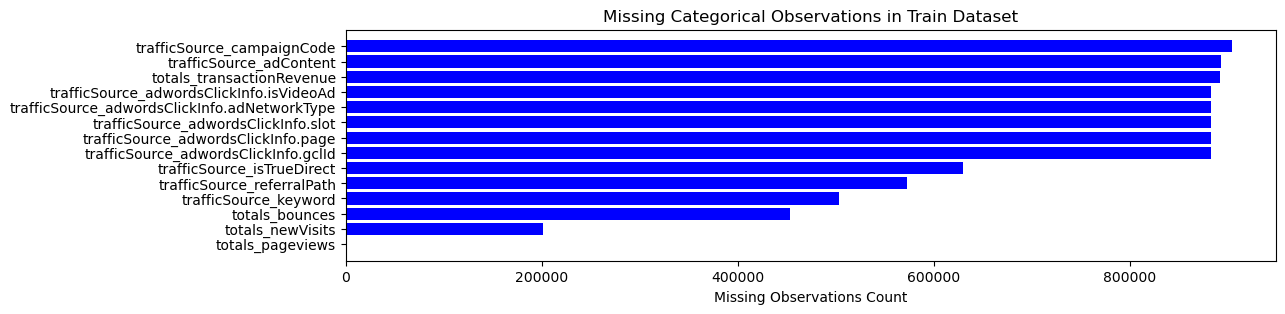

In [ ]:
missing_values = categorical_features_train.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')
ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Categorical Observations in Train Dataset")
plt.show()

In [ ]:
total_test = categorical_features_test.isnull().sum().sort_values(ascending=False)
percent = (categorical_features_test.isnull().sum()/categorical_features_test.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total_test, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(12)

,Total Missing Count,% of Total Observations
Feature,,
trafficSource_adContent,750893,93.315264
trafficSource_adwordsClickInfo.isVideoAd,750870,93.312406
trafficSource_adwordsClickInfo.adNetworkType,750870,93.312406
trafficSource_adwordsClickInfo.slot,750870,93.312406
trafficSource_adwordsClickInfo.page,750870,93.312406
trafficSource_adwordsClickInfo.gclId,750822,93.306441
trafficSource_referralPath,569361,70.755850
trafficSource_isTrueDirect,544171,67.625428
trafficSource_keyword,391032,48.594479


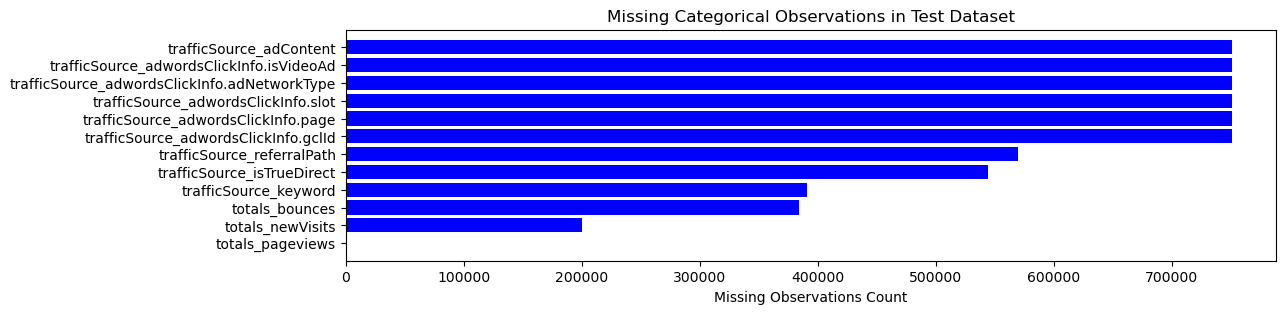

In [ ]:
missing_values = categorical_features_test.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')
ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Categorical Observations in Test Dataset")
plt.show()

In [ ]:
colorscale = [[0, 'rgb(102,194,165)'], [0.0005, 'rgb(102,194,165)'],
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'],
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'],
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = train["geoNetwork_country"].value_counts().index,
        locationmode = 'country names',
        z = train["geoNetwork_country"].value_counts().values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 1)),
            colorbar = dict( title = 'Customer Visits ')
            )
       ]

layout = dict(
    height=600,
    title = 'World Wide Customer Visit Distribution',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 50,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)

In [ ]:
colorscale = [[0, 'rgb(102,194,165)'], [0.0005, 'rgb(102,194,165)'],
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'],
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'],
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = train["geoNetwork_country"].value_counts().index,
        locationmode = 'country names',
        z = train["geoNetwork_country"].value_counts().values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 1)),
            colorbar = dict( title = 'Customer Visits ')
            )
       ]

layout = dict(
    height=600,
    title = 'World Wide Customer Visit Distribution',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'conic equal area',
            rotation = dict(
                    lon = 50,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)

In [ ]:
geo_cols = ["geoNetwork_city", "geoNetwork_country", "geoNetwork_subContinent", "geoNetwork_continent"]
colors = ["#d6a5ff", "#fca6da", "#f4d39c", "#a9fcca"]
traces = []
for i, col in enumerate(geo_cols):
    t = train[col].value_counts()
    traces.append(go.Bar(marker=dict(color=colors[i]),orientation="h", y = t.index[:15], x = t.values[:15]))

fig = tools.make_subplots(rows=2, cols=2,
                          subplot_titles=["Visits: City", "Visits: Country","Visits: Sub Continent","Visits: Continent"]
                          , print_grid=False)
fig.append_trace(traces[0], 1, 1)
fig.append_trace(traces[1], 1, 2)
fig.append_trace(traces[2], 2, 1)
fig.append_trace(traces[3], 2, 2)

fig['layout'].update(height=600,width=1000, showlegend=False)
iplot(fig)

train["totals_transactionRevenue"] = train["totals_transactionRevenue"].astype('float')

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=["Mean Revenue by City", "Mean Revenue by Country","Mean Revenue by Sub Continent","Mean Revenue by Continent"], print_grid=False)

colors = ["red", "green", "purple","blue"]
trs = []
for i, col in enumerate(geo_cols):
    tmp = train.groupby(col).agg({"totals_transactionRevenue": "mean"}).reset_index().rename(columns={"totals_transactionRevenue" : "Mean Revenue"})
    tmp = tmp.dropna()
    tr = go.Bar(x = tmp["Mean Revenue"], orientation="h", marker=dict(opacity=0.5, color=colors[i]), y = tmp[col])
    trs.append(tr)

fig.append_trace(trs[0], 1, 1)
fig.append_trace(trs[1], 1, 2)
fig.append_trace(trs[2], 2, 1)
fig.append_trace(trs[3], 2, 2)

fig['layout'].update(height=600,width=1000, showlegend=False)
iplot(fig)

C:\Users\mahes\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
t = train['channelGrouping'].value_counts()
values1 = t.values
index1 = t.index
domain1 = {'x': [0.2, 0.50], 'y': [0.0, 0.33]}
fig = {
  "data": [
    {
      "values": values1,
      "labels": index1,
      "domain": {"x": [0, .48]},
    "marker" : dict(colors=["#f77b9c" ,'#ab97db',  '#b0b1b2']),
      "name": "Channel Grouping",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    }
   ],
  "layout": {"title":"Channel Grouping",
      "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Channel Grouping",
                "x": 0.11,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

In [ ]:
fig = tools.make_subplots(rows=1, cols=2,subplot_titles=["Traffic Source Campaign (not-set removed)", "Traffic Source Medium"], print_grid=False)

colors = ["#d6a5ff", "#fca6da", "#f4d39c", "#a9fcca"]
t1 = train["trafficSource_campaign"].value_counts()
t2 = train["trafficSource_medium"].value_counts()

tr1 = go.Bar(x = t1.index, y = t1.values, marker=dict(color=colors[1]))
tr2 = go.Bar(x = t2.index, y = t2.values, marker=dict(color=colors[2]))

fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)


fig['layout'].update(height=400, margin=dict(b=100), showlegend=False)
iplot(fig)

C:\Users\mahes\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
def add_date_features(df):
    df['date'] = df['date'].astype(str)
    df["date"] = df["date"].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
    df["date"] = pd.to_datetime(df["date"])

    df["month"]   = df['date'].dt.month
    df["day"]     = df['date'].dt.day
    df["weekday"] = df['date'].dt.weekday
    return df

In [ ]:
train = add_date_features(train)

In [ ]:
# Visualization for Visits by date
tmp = train['date'].value_counts().to_frame().reset_index().sort_values('index')
tmp = tmp.rename(columns = {"index" : "dateX", "date" : "visits"})

tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["visits"])
layout = go.Layout(title="Visits by Date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)
# Visualization for Visits by monthly revenue
tmp = train.groupby("date").agg({"totals_transactionRevenue" : "mean"}).reset_index()
tmp = tmp.rename(columns = {"date" : "dateX", "totals_transactionRevenue" : "mean_revenue"})
tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["mean_revenue"])
layout = go.Layout(title="Monthly Revenue by Date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)

In [ ]:
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["Visits by Month", "Visits by Month Day", "Visits by Week Day"], print_grid=False)
trs = []
for i,col in enumerate(["month", "day", "weekday"]):
    t = train[col].value_counts()
    tr = go.Bar(x = t.index, marker=dict(color=colors[i]), y = t.values)
    trs.append(tr)

fig.append_trace(trs[0], 1, 1)
fig.append_trace(trs[1], 1, 2)
fig.append_trace(trs[2], 1, 3)
fig['layout'].update(height=400, showlegend=False)
iplot(fig)

C:\Users\mahes\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
tmp1 = train.groupby('month').agg({"totals_transactionRevenue" : "mean"}).reset_index()
tmp2 = train.groupby('day').agg({"totals_transactionRevenue" : "mean"}).reset_index()
tmp3 = train.groupby('weekday').agg({"totals_transactionRevenue" : "mean"}).reset_index()

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["MeanRevenue by Month", "MeanRevenue by MonthDay", "MeanRevenue by WeekDay"], print_grid=False)
tr1 = go.Bar(x = tmp1.month, marker=dict(color="yellow", opacity=0.5), y = tmp1.totals_transactionRevenue)
tr2 = go.Bar(x = tmp2.day, marker=dict(color="blue", opacity=0.5), y = tmp2.totals_transactionRevenue)
tr3 = go.Bar(x = tmp3.weekday, marker=dict(color="violet", opacity=0.5), y = tmp3.totals_transactionRevenue)

fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)
fig.append_trace(tr3, 1, 3)
fig['layout'].update(height=400, showlegend=False)
iplot(fig)


C:\Users\mahes\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

agg_dict = {}
for col in ["totals_bounces", "totals_hits", "totals_newVisits", "totals_pageviews", "totals_transactionRevenue"]:
    train[col] = train[col].astype('float')
    agg_dict[col] = "sum"
tmp = train.groupby("fullVisitorId").agg(agg_dict).reset_index()
tmp.head()

,fullVisitorId,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_transactionRevenue
0,0000010278554503158,0.0,11.0,1.0,8.0,0.0
1,0000020424342248747,0.0,17.0,1.0,13.0,0.0
2,0000027376579751715,0.0,6.0,1.0,5.0,0.0
3,0000039460501403861,0.0,2.0,1.0,2.0,0.0
4,0000040862739425590,0.0,5.0,1.0,5.0,0.0


There are 9996 visitors in the train dataset having non zero total transaction revenue


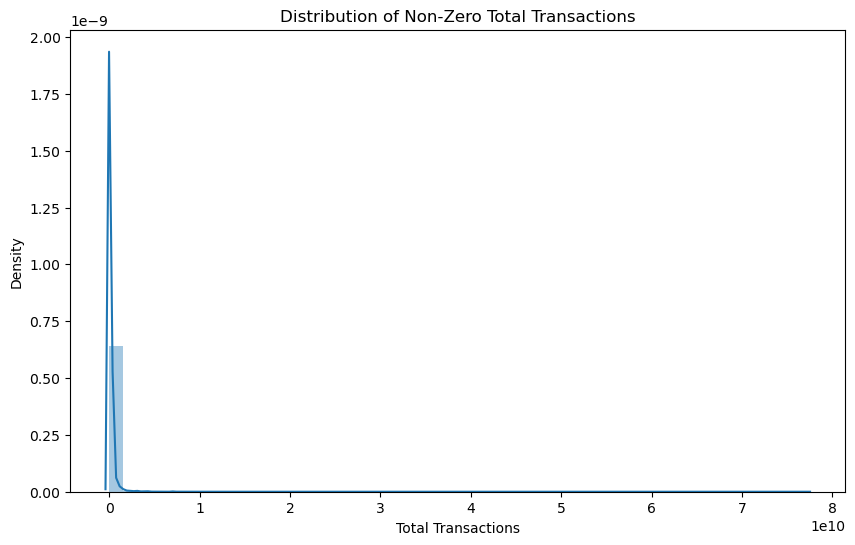

In [ ]:
non_zero = tmp[tmp["totals_transactionRevenue"] > 0]["totals_transactionRevenue"]
print ("There are " + str(len(non_zero)) + " visitors in the train dataset having non zero total transaction revenue")

plt.figure(figsize=(10,6))
sns.distplot(non_zero)
plt.title("Distribution of Non-Zero Total Transactions");
plt.xlabel("Total Transactions");

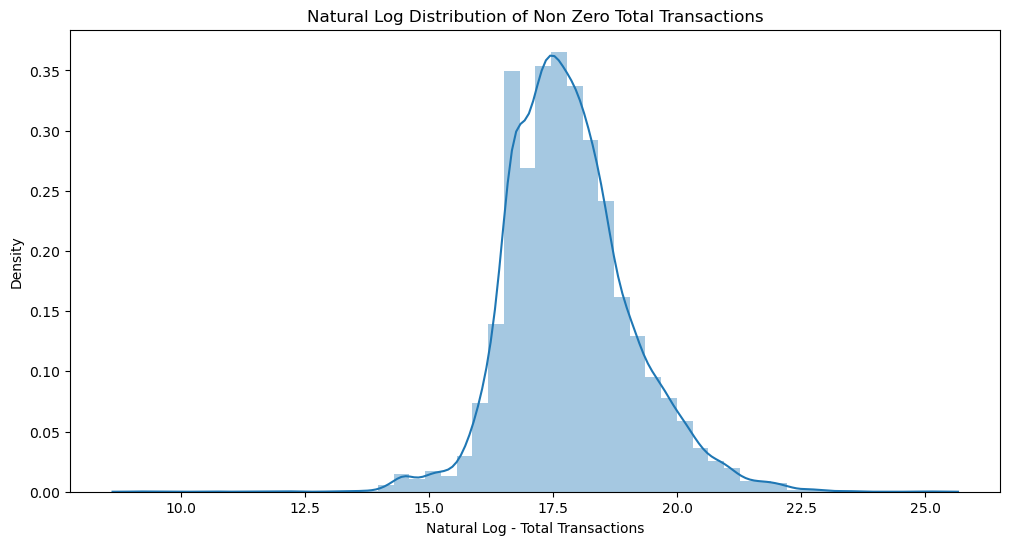

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(np.log1p(non_zero))
plt.title("Natural Log Distribution of Non Zero Total Transactions");
plt.xlabel("Natural Log - Total Transactions");

In [ ]:
constant_columns = []
for col in train.columns:
    if len(train[col].value_counts()) == 1:
        constant_columns.append(col)

## non relevant columns
non_relevant = ["visitNumber", "date", "fullVisitorId", "sessionId", "visitId", "visitStartTime"]

In [ ]:
test = add_date_features(test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [c for c in train.columns if not c.startswith("total")]
categorical_columns = [c for c in categorical_columns if c not in constant_columns + non_relevant]
for c in categorical_columns:

    le = LabelEncoder()
    train_vals = list(train[c].values.astype(str))
    test_vals = list(test[c].values.astype(str))

    le.fit(train_vals + test_vals)

    train[c] = le.transform(train_vals)
    test[c] = le.transform(test_vals)

In [ ]:
def normalize_numerical_columns(df, isTrain = True):
    df["totals_hits"] = df["totals_hits"].astype(float)
    df["totals_hits"] = (df["totals_hits"] - min(df["totals_hits"])) / (max(df["totals_hits"]) - min(df["totals_hits"]))

    df["totals_pageviews"] = df["totals_pageviews"].astype(float)
    df["totals_pageviews"] = (df["totals_pageviews"] - min(df["totals_pageviews"])) / (max(df["totals_pageviews"]) - min(df["totals_pageviews"]))

    if isTrain:
        df["totals_transactionRevenue"] = df["totals_transactionRevenue"].fillna(0.0)
    return df

In [ ]:
train = normalize_numerical_columns(train)
test = normalize_numerical_columns(test, isTrain = False)

In [ ]:
from sklearn.model_selection import train_test_split
features = [c for c in train.columns if c not in constant_columns + non_relevant]
features.remove("totals_transactionRevenue")
train["totals_transactionRevenue"] = np.log1p(train["totals_transactionRevenue"].astype(float))
train_x, valid_x, train_y, valid_y = train_test_split(train[features], train["totals_transactionRevenue"], test_size=0.25, random_state=20)

In [ ]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\mahes\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-3.2.1             |   py39hd77b12b_0         754 KB
    ------------------------------------------------------------
                                           Total:         754 KB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/win-64::lightgbm-3.2.1-py39hd77b12b_0 




lightgbm-3.2.1       | 754 KB    |            |   0% 
lightgbm-3.2.1       | 754 KB    | 2          |   2% 
lightgbm-3.2.1       | 754 KB    | ###1       |  32% 
lightgbm-3.2.1       | 754 KB    | ########## | 100% 
lightgbm-3.2.1       | 754 KB    | ########## | 100% 
                                                     


Preparing transaction: ...working... done
Verifying transact

In [ ]:
import lightgbm as lgb

lgb_params = {"objective" : "regression", "metric" : "rmse",
              "num_leaves" : 50, "learning_rate" : 0.02,
              "bagging_fraction" : 0.75, "feature_fraction" : 0.8, "bagging_frequency" : 9}

lgb_train = lgb.Dataset(train_x, label=train_y)
lgb_val = lgb.Dataset(valid_x, label=valid_y)
model = lgb.train(lgb_params, lgb_train, 700, valid_sets=[lgb_val], early_stopping_rounds=150, verbose_eval=20)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2081
[LightGBM] [Info] Number of data points in the train set: 677739, number of used features: 27
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Info] Start training from score 0.226447
Training until validation scores don't improve for 150 rounds
[20]	valid_0's rmse: 1.84338
[40]	valid_0's rmse: 1.75602
[60]	valid_0's rmse: 1.71234
[80]	valid_0's rmse: 1.68674
[100]	valid_0's rmse: 1.67271
[120]	valid_0's rmse: 1.66383
[140]	valid_0's rmse: 1.65795
[160]	valid_0's rmse: 1.65311
[180]	valid_0's rmse: 1.65015
[200]	valid_0's rmse: 1.64766
[220]	valid_0's rmse: 1.64585
[240]	valid_0's rmse: 1.6444

In [ ]:
preds = model.predict(test[features], num_iteration=model.best_iteration)
test["PredictedLogRevenue"] = np.expm1(preds)
submission = test.groupby("fullVisitorId").agg({"PredictedLogRevenue" : "sum"}).reset_index()
submission["PredictedLogRevenue"] = np.log1p(submission["PredictedLogRevenue"])
submission["PredictedLogRevenue"] =  submission["PredictedLogRevenue"].apply(lambda x : 0.0 if x < 0 else x)
submission.to_csv("baseline.csv", index=False)
submission.head()

C:\Users\mahes\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log1p



,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.053754
1,0000049363351866189,0.000121
2,0000053049821714864,0.000000
3,0000059488412965267,0.002343
4,0000085840370633780,0.018547
